# First OOMMFC notebook


## Working on nanoHUB

There are a couple of things to be aware of when running OOMMF notebooks on nanoHUB.

* You must use Python3 notebooks
* nanoHUB has oommf installed as an environment module.  Normally tools would load this in the invoke script and that will also work for published notebooks.  However, unpublished notebooks are started without oommf and it must be loaded before you run oommf code.  The next cell shows how to do so.

In [1]:
import hublib.use
%use oommf-1.2b0

## Simple micromagnetic problem

As the first step, we need to import `oommfc` and `discretisedfield`.

In [2]:
import oommfc as oc
import discretisedfield as df

Now, we create a very simple system object and provide:

- Hamiltonian,
- dynamics, and
- magnetisation configuration.

In [3]:
system = oc.System(name="first_notebook")

We define the mesh by providing two points between which the domain spans as well as the size of the discretisation cell.

In [4]:
L = 100e-9
d = 10e-9
mesh = oc.Mesh(p1=(0, 0, 0), p2=(L, L, L), cell=(d, d, d))

Our Hamiltonian contains only exchange, demagnetisation, and Zeeman energy terms. We will apply the external magnetic field in the "x" direction, because that allows us to easily predict the equilibrium state of such micromagnetic system.

In [5]:
A = 1e-12
H = (8e6, 0, 0)
system.hamiltonian = oc.Exchange(A=A) + oc.Demag() + oc.Zeeman(H=H)

Dynamics of the system is governed by the LLG equation containing precession and damping terms.

In [6]:
alpha = 0.2
system.dynamics = oc.Precession(gamma=oc.gamma0) + oc.Damping(alpha=alpha)

We initialise the system in (0, 0, 1) direction, which is clearly different from our expected equlibrium state.

In [7]:
system.m = df.Field(mesh, value=(0, 1, 0), norm=8e6)

We can check the characteristics of the system we defined

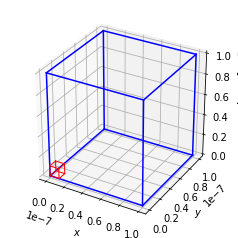

In [8]:
%matplotlib inline
mesh

In [9]:
system.hamiltonian

Exchange(A=1e-12, name="exchange") + Demag(name="demag") + Zeeman(H=(8000000.0, 0, 0), name="zeeman")

In [10]:
system.dynamics

Precession(gamma=221276.14872118403, name="precession") + Damping(alpha=0.2, name="damping")

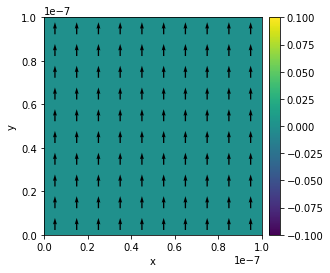

In [11]:
fig = system.m.plot_plane("z")

After the system object is created, we can minimise its energy (relax it) using the Minimisation Driver (`MinDriver`).

In [12]:
md = oc.MinDriver()
md.drive(system)

2017/11/20 17:17: Calling OOMMF (first_notebook/first_notebook.mif) ... [1.4s]


The system is now relaxed, and we can plot its slice and compute its average magnetisation.

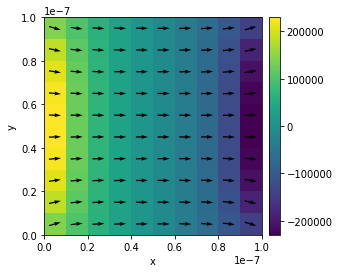

In [13]:
fig = system.m.plot_plane("z")

In [14]:
system.m.average

(7943727.692409087, 3.4497631015256044e-05, -7.4505805969238283e-12)

We can see that the magnetisation is aligned along the "x" direction, as expected having in mind we applied the external magnetic field in that direction.

<hr>
Cleaning up.  Temporary files were written.  You may want to remove them.

In [15]:
!rm -rf first_notebook